## Introduction

In the last lesson, we learned how adding hidden layers of neurons to a neural network can improve its ability to capture nonlinearity in the data. We tested different neural networks models on a dataset that we generated with deliberate nonlinearity.

In this Guided Project, we'll:

* explore why image classification is a hard task
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification

As we mentioned in the first lesson in this course, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks here.

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper.

Why is image classification a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

You'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

## Working with Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the `numpy.reshape()` function:

In [1]:
first_image = train.iloc[0]
first_image = first_image.drop('label', axis=1)
np_image = first_image.values
np_image = np_image.reshape(28,28)

NameError: name 'train' is not defined

Now that the data is in the right shape, we can visualize it using `pyplot.imshow()` function:

In [ ]:
plt.imshow(np_image, cmap='gray_r')

To display multiple images in one matplotlib figure, we can use the equivalent axes.imshow() function. Let's use what we've learned to display images from both classes.

### Instructions
* Import `load_digits()` from the `sklearn.datasets` package.
* Transform the NumPy 2D array into a pandas dataframe.
* Use matplotlib to visualize some of the images in the dataset.
  * Generate a scatter plot grid, with 2 rows and 4 columns.
  * In the first row:
    * Display the images corresponding to rows 0, 100, 200, and 300.
  * In the second row:
    * Display the images corresponding to rows 1000, 1100, 1200, and 1300.

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

image=load_digits()
#lets see the keys in the dict
image.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
#let's create the labels and features

features=pd.DataFrame(image['data'])
labels=pd.Series(image['target'])

print(features.shape)
print(labels.shape)

(1797, 64)
(1797,)


In [5]:
first_image =features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(28,28)

plt.imshow(np_image, cmap='gray_r');

ValueError: cannot reshape array of size 64 into shape (28,28)

since the size is 64, we are going to reshape it (8,8)

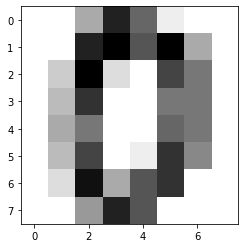

In [6]:
first_image =features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r');

In [7]:
features.iloc[[0,100,200,300]]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
100,0.0,0.0,0.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,6.0,0.0,0.0
200,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,0.0,0.0
300,0.0,0.0,1.0,11.0,16.0,16.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,3.0,0.0,0.0,0.0


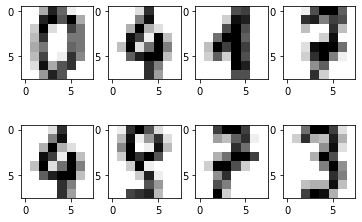

In [8]:
f, axarr = plt.subplots(2, 4)
#Display the images corresponding to rows 0, 100, 200, and 300
axarr[0, 0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(features.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(features.iloc[200].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(features.iloc[300].values.reshape(8,8), cmap='gray_r')

#Display the images corresponding to rows 1000, 1100, 1200, and 1300
axarr[1, 0].imshow(features.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(features.iloc[1100].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(features.iloc[1200].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(features.iloc[1300].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Recall that you can use the KNeighborsClassifier package to train and test k-nearest neighbors models.

### Instructions
* Split up the data into train and test sets.
* Setup a pipeline for testing and training k-nn models.
  * Write a function named `train()` that uses `KNeighborsClassifer` for training k-nearest neighbors models.
  * Write a function named `test()` that tests the model.
  * Write a function named `cross_validate()` that performs 4-fold cross validation using `train()` and `test()`.
* Experiment with different values for k and plot the resulting classification accuracies.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

#split the data into train and test datset
X = features
y = labels

X_train,y_train,X_test,y_test =  train_test_split(X, y, test_size = 0.2)

def train(n_neighbors,X_train,y_train):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn
       
def test(model,X_test,y_test):
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(test_pred,y_test)
    return test_accuracy


def cross_validate(k):
    accuracy_scores = []
    kfold_val = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index,test_index in kfold_val.split(X):
        X_train , X_test = X.loc[train_index], X.loc[test_index]
        y_train , y_test = y.loc[train_index] , y.loc[test_index]
        model = train(k,X_train,y_train)
        accuracy = test(model,X_test,y_test)
        accuracy_scores.append(accuracy)
    return accuracy_scores



        
knn_accuracies = cross_validate(2)
np.mean(knn_accuracies)

0.9821912892848305

 Experiment with different values for k and plot the resulting classification accuracies.

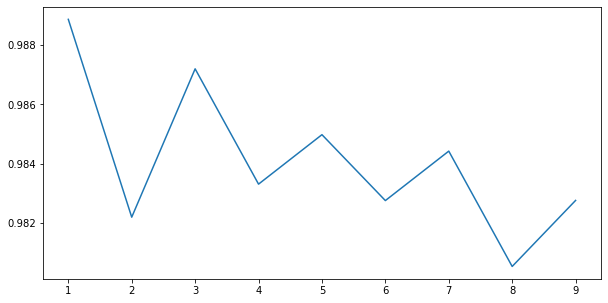

In [10]:
k_values = list(range(1,10))
k_overall_accuracies = []

for i in k_values:
    knn_accuracies = cross_validate(i)
    k_overall_accuracies.append(np.mean(knn_accuracies))

plt.figure(figsize=(10,5))
plt.plot(k_values,k_overall_accuracies)

There are a few downsides to using k-nearest neighbors:

high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
no model representation to debug and explore
Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn. 

### Instructions

* Using 4-fold cross validation:

  * Train and test a neural network model using a single hidden layer of 8 neurons.
  * Train and test a neural network model using a single hidden layer of 16 neurons.
  * Train and test a neural network model using a single hidden layer of 32 neurons.
  * Train and test a neural network model using a single hidden layer of 64 neurons.
  * Train and test a neural network model using a single hidden layer of 128 neurons.
  * Train and test a neural network model using a single hidden layer of 256 neurons.

* Create a new Markdown cell summarizing what you saw.

  * Rank the performance of the models by the overall accuracies.
  * Which models, if any, start to overfit?

    * For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [22]:
from sklearn.neural_network import MLPClassifier


def nn_train(neuron,X_train,y_train):
    mlp = MLPClassifier(hidden_layer_sizes=(neuron,))
    mlp.fit(X_train,y_train)
    return mlp
       
def nn_test(model,X_test,y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    return accuracy


def nn_cross_validate(neuron):
    accuracies = []
    kfold_val = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index,test_index in kfold_val.split(X):
        X_train , X_test = X.loc[train_index], X.loc[test_index]
        y_train , y_test = y.loc[train_index] , y.loc[test_index]
        model = nn_train(neuron,X_train,y_train)
        accuracy =nn_test(model,X_test,y_test)
        accuracies.append(accuracy)
    return accuracies

np.mean(nn_cross_validate(8))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8837564959168522

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


the accuracy of 8 neuron is 0.9076095025983668


C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


the accuracy of 16 neuron is 0.9493664934422174


C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


the accuracy of 32 neuron is 0.9627159119029942
the accuracy of 64 neuron is 0.966066567681267
the accuracy of 128 neuron is 0.9710690423162583
the accuracy of 256 neuron is 0.9782999257609503


Text(0.5, 1.0, 'Mean Accuracy vs Single layered neuron')

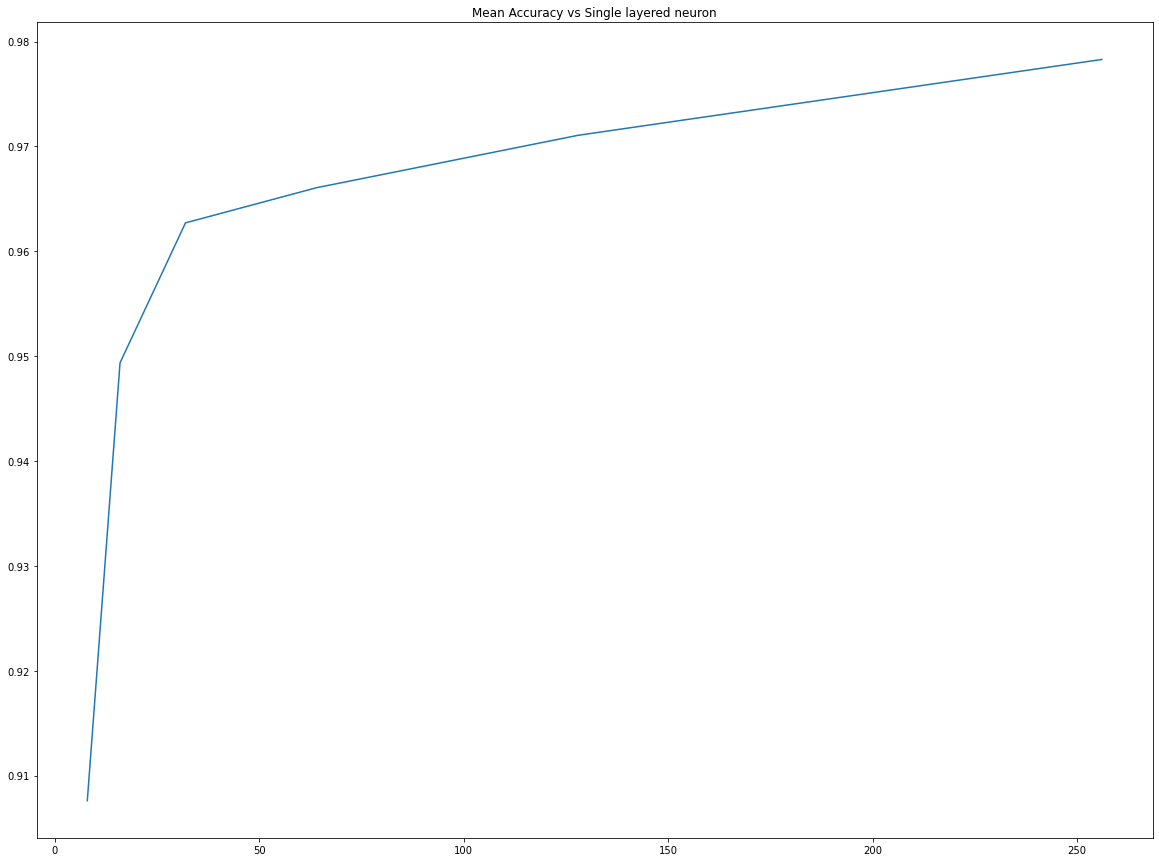

In [25]:
neurons=[8,16,32,64,128,256]
accuracy_list = []
for neuron in neurons:
    accuracy = nn_cross_validate(neuron)
    accuracy_list.append(np.mean(accuracy))
    print('the accuracy of {} neuron is {}'.format(neuron,np.mean(accuracy)))
    
plt.figure(figsize=(20,15))
plt.plot(neurons,accuracy_list)
plt.title('Mean Accuracy vs Single layered neuron')

As the neuron increaed, the model accuracy increased to approximately 97%. There doesn't seem to be much advantage of using the hidden single layered neuron because we achieved an accuracy of 98% using a simple KNN model


## Neural Network With Two Hidden Layers
Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

### Instructions
* Modify the neural network training pipeline to use 2 hidden layers instead in the network.
* Using 4-fold cross validation:
  * Train a neural network model using 2 hidden layers:
    * 64 neurons in the first hidden layer.
    * 64 neurons in the second hidden layer.

Create a new Markdown cell summarizing what you saw.

* Rank the performance of the models by the overall accuracies.
* Which models, if any, start to overfit?
  * For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [44]:
def dn_train(n1,n2,X_train,y_train):
    mlp = MLPClassifier(hidden_layer_sizes=(n1,n2))
    mlp.fit(X_train,y_train)
    return mlp
       
def dn_test(model,X_test,y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    return accuracy


def dn_cross_validate(n1,n2):
    dn_accuracy = []
    kfold_val = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index,test_index in kfold_val.split(X):
        X_train , X_test = X.loc[train_index], X.loc[test_index]
        y_train , y_test = y.loc[train_index] , y.loc[test_index]
        model = dn_train(n1,n2,X_train,y_train)
        accuracy =dn_test(model,X_test,y_test)
        dn_accuracy.append(accuracy)
    return dn_accuracy

np.mean(dn_cross_validate(128,128))

0.9783061123484287

In [50]:
neuron_list=[(8,8), (16,16), (32,32), (64,64), (128,128), (256,256)]
nn_two_accuracies = []

for n1,n2 in neuron_list:
    accuracy = dn_cross_validate(n1,n2)
    nn_two_accuracies.append(np.mean(accuracy))
    print('the accuracy of {} neuron is {}'.format((n1,n2),np.mean(accuracy)))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


the accuracy of (8, 8) neuron is 0.9003872803761445


C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


the accuracy of (16, 16) neuron is 0.9493652561247216
the accuracy of (32, 32) neuron is 0.9660603810937887
the accuracy of (64, 64) neuron is 0.9721863400148477
the accuracy of (128, 128) neuron is 0.9755233853006681
the accuracy of (256, 256) neuron is 0.9805320465231379


Text(0.5, 1.0, 'Mean Accuracy vs two layered neuron')

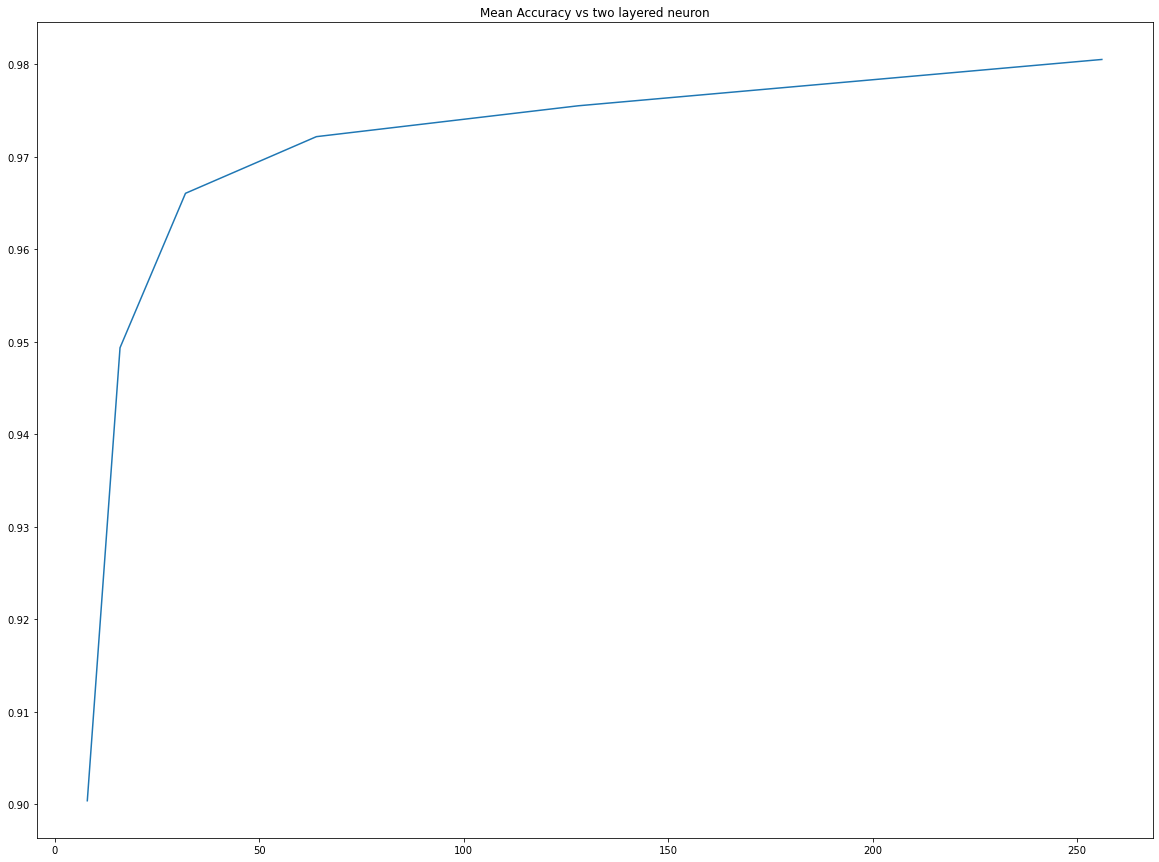

In [67]:
plt.figure(figsize=(20,15))
plt.plot([i[0] for i in neuron_list],nn_two_accuracies)
plt.title('Mean Accuracy vs two layered neuron')

There is no much difference in the output gotten from two hidden layer neurone versus the single layered neuron.

## Neural Network With Three Hidden Layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

### Instructions
* Modify the neural network training pipeline to use 6 fold cross validation instead.
* Train a neural network model using 3 hidden layers:
  * 10 neurons in the first hidden layer.
  * 10 neurons in the second hidden layer.
  * 10 neurons in the third hidden layer.
* Train a neural network model using 3 hidden layers:
  * 64 neurons in the first hidden layer.
  * 64 neurons in the second hidden layer.
  * 64 neurons in the third hidden layer.
* Train a neural network model using 3 hidden layers:
  * 128 neurons in the first hidden layer.
  * 128 neurons in the second hidden layer.
  * 128 neurons in the third hidden layer.

Create a new Markdown cell summarizing what you saw.

* Rank the performance of the models by the overall accuracies.
* Which models, if any, start to overfit?
* For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [68]:
def tn_train(n1,n2,n3,X_train,y_train):
    mlp = MLPClassifier(hidden_layer_sizes=(n1,n2))
    mlp.fit(X_train,y_train)
    return mlp
       
def tn_test(model,X_test,y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(pred,y_test)
    return accuracy


def tn_cross_validate(n1,n2,n3):
    tn_accuracy = []
    kfold_val = KFold(n_splits=6, random_state=2, shuffle=True)
    for train_index,test_index in kfold_val.split(X):
        X_train , X_test = X.loc[train_index], X.loc[test_index]
        y_train , y_test = y.loc[train_index] , y.loc[test_index]
        model = tn_train(n1,n2,n3,X_train,y_train)
        accuracy =tn_test(model,X_test,y_test)
        tn_accuracy.append(accuracy)
    return tn_accuracy

In [69]:
neuron_three=[(10,10,10), (64,64,64), (128,128,128)]
nn_three_accuracies = []

for n1,n2,n3 in neuron_three:
    accuracy = tn_cross_validate(n1,n2,n3)
    nn_three_accuracies.append(np.mean(accuracy))
    print('the accuracy of {} neuron is {}'.format((n1,n2,n3),np.mean(accuracy)))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

the accuracy of (10, 10, 10) neuron is 0.9287885544407284
the accuracy of (64, 64, 64) neuron is 0.9738573021181717
the accuracy of (128, 128, 128) neuron is 0.978307320698625


Text(0.5, 1.0, 'Mean Accuracy vs three layered neuron')

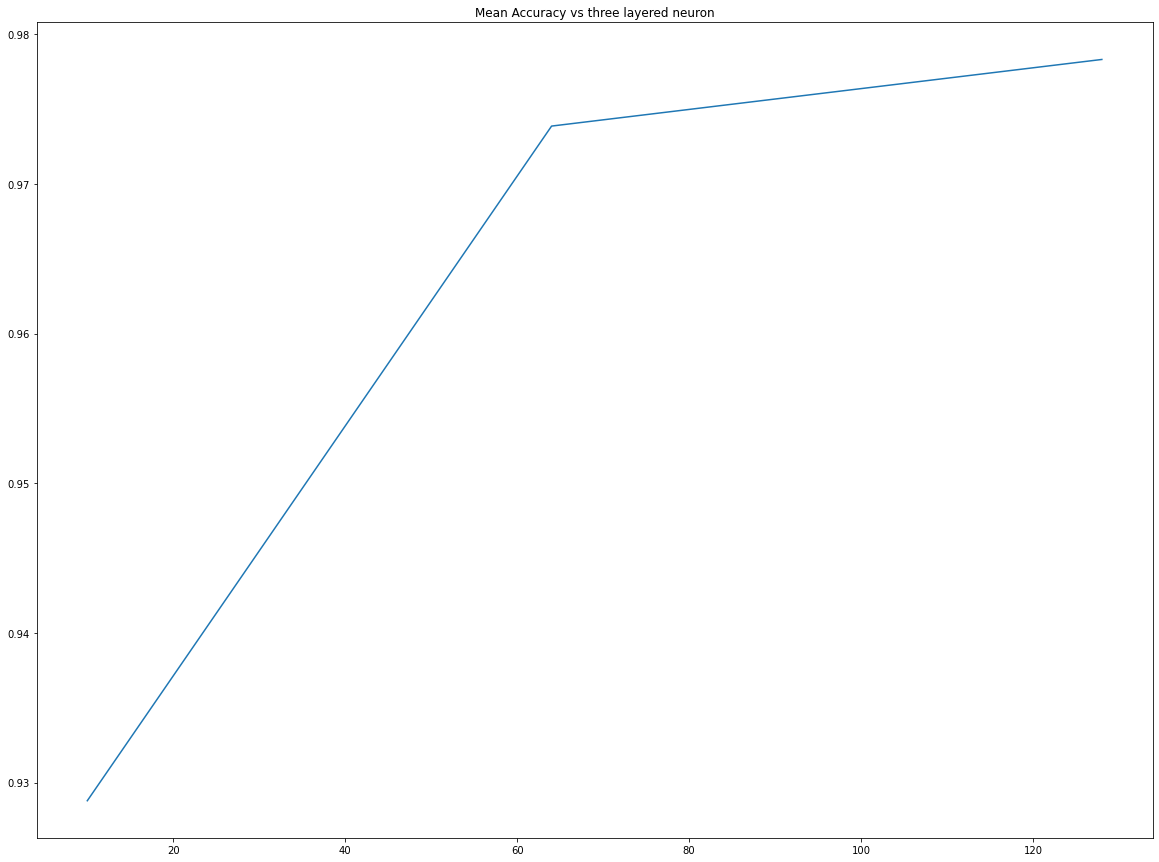

In [70]:
plt.figure(figsize=(20,15))
plt.plot([i[0] for i in neuron_three],nn_three_accuracies)
plt.title('Mean Accuracy vs three layered neuron')

the accuracy of model with three hidden layers of neurons still rotates around 97.8%. It looks like there is no effect of modelling using hidden layers on this dataset, as the simple KNN model still performed the best amongst the four models

## Next Steps
In this guided project, you experimented with different models to classify handwritten digits. That's it for the guided steps.

Here are some next steps to try:

* Use the existing pipeline you've built to try other machine learning models:
  * Decision Tree Models
  * Random Forest Models

* Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.
* Experiment with different activation functions to see if the accuracies improve.
* Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
  * Visualization of MLP Weights on MNIST

Curious to see what other students have done on this project? Head over to our Community to check them out. While you are there, please remember to show some love and give your own feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!

In future courses, we'd like to dive deeper into:

* Image classification and computer vision
* Higher performance tools for neural networks (like Tensorflow or PyTorch)
* Different neural network architectures (like Convolutional Neural Networks

# Using Decision Tree Classification

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [85]:
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

X_train=train_features
X_test=test_features
y_train=train_labels
y_test=test_labels

In [90]:
def tree_train(X_train,y_train):
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    return tree
       
def tree_test(model,X_test,y_test):
    tree_pred = model.predict(X_test)
    tree_accuracy = accuracy_score(tree_pred,y_test)
    return tree_accuracy


model=tree_train(X_train,y_train)
tree_test(model,X_test,y_test)

0.8375973303670745

## Single layered neuron model

In [ ]:
tree_values = list(range(1,10))
tree_overall_accuracies = []

for i in tree_values:
    tree_accuracies = tree_cross_validate(i)
    tree_overall_accuracies.append(np.mean(tree_accuracies))
    print('the accuracy of {} neuron is {}'.format((i),np.mean(tree_overall_accuracies)))
    

plt.figure(figsize=(10,5))
plt.plot(k_values,k_overall_accuracies)